<a href="https://colab.research.google.com/github/AniketMishra23/Image-Classification-Using-ML/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("macaw parrot",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/macaw parrot


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://theexoticbirds.net/wp-content/uploads/2018/05/true-parrot.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.pafoszoo.com/wp-content/uploads/2018/12/thick-billed-parrot.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://3.bp.blogspot.com/_5mmtDKXabEY/SwjmOyWJiXI/AAAAAAAAAHk/O-FsZLpgBrA/s1600/Red-Parrots-2.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://media.istockphoto.com/photos/gelbbrustara-macaw-on-perch-picture-id1071774564?k=6&amp;m=1071774564&amp;s=612x612&amp;w=0&amp;h=hayWGOhBTm3oYB-B9OPkeWakOsC6BxOKwNPwF_wnB1w=
[%] File Downloaded !

[%] Downloading Image #5 from https://banner2.kisspng.com/20180213/jfe/kisspng-amazon-parrot-bird-true-parrot-computer-file-parrot-5a82dfd75a94c5.368510161518526423371.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.pafoszoo.com/

In [ ]:
downloader.download("cute puppy",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/cute puppy


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/23/e3/d5/23e3d5fd300541d900e41d739977ccfa.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/736x/f4/d8/c4/f4d8c4d137b74631892cdab39469185a.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/db/86/56/db865665e4e1020f0fbfbed7295e640d.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/c6/b2/e6/c6b2e69c7a31518cd760f5bfab302196.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/51/26/81/512681bc561d4a70efbb5d100e98c768.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/3c/ac/ed/3caced86307dc5ca1b903fe0edb1fbe3.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.pinimg.com/736x/1c/86/e6/1c86e6372efbd50d1eb1fbc2688d8caa.jpg
[%] File Do

In [ ]:
downloader.download("beautiful flowers",limit=30,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/beautiful flowers


[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/9c/29/47/9c2947eb63e322150f240aadd3097e28.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/originals/83/e2/df/83e2df8b2d27ac8eed32a4dfff18b023.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/35/fe/ed/35feed534a62d8ca6546523e0dc8c5a4.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/a5/4e/1f/a54e1fd58a658476b63c9c255ad21e83.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/cf/dd/b3/cfddb30799692c9733bf978819febc60.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/736x/05/1d/c9/051dc9d7c69358c2c62dddd910c8ca34.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.pinimg.com/originals/5c/e5/4d/5ce54d8b432414ae963301a16a96c390.jpg

In [ ]:
#Preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
import skimage.io as imread
import skimage.transform as resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['beautiful flowers','cute puppy','macaw parrot']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread.imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize.resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
  
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size=0.3,random_state=102)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1,
       0, 0, 0, 0, 2])

In [ ]:
y_test

array([0, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1,
       0, 0, 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.8148148148148148

In [ ]:
confusion_matrix(y_pred,y_test)

array([[9, 1, 0],
       [2, 8, 1],
       [1, 0, 5]])

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter you URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS8J3zYgT9y6xzkRXmdMWjMjPkbnD0Ty-eem3p-p1eTIepEaGFqsyUsJ0k5jBigjk63ivY&usqp=CAU
(275, 183, 3)
 EXPECTED OUTPUT: cute puppy


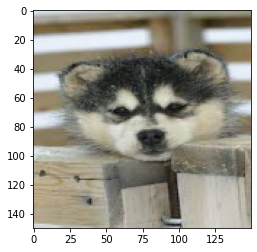

In [ ]:
flat_data = []
url = input('Enter you URL')
img = imread.imread(url)
img_resized = resize.resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' EXPECTED OUTPUT: {y_out}')

In [ ]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

     |████████████████████████████████| 7.8MB 5.5MB/s 
     |████████████████████████████████| 174kB 21.8MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 4.2MB 33.4MB/s 
     |████████████████████████████████| 112kB 41.3MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 
     |████████████████████████████████| 122kB 39.1MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13476 sha256=39b66df61f7b4421d0c6f6d46c44b5298e85d5af06f76617c935f544325f0b1b
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: ipykernel 4.10.1
    Uninstalling ipykernel-4.10.1:
      Successfully uninstalled ipykernel-4.10.1


     |████████████████████████████████| 747kB 4.9MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.0.5-cp37-none-any.whl size=19262 sha256=44d8b74593576583aa05b6462c85f847f68ad7b9f385c38fb01aec7c0be284e3
  Stored in directory: /root/.cache/pip/wheels/0c/13/64/5ebbcc22eaf53fdf5766b397c1fb17c83f5775fdccf0ea1b88
Successfully built pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import skimage.io as imread
import skimage.transform as resize
import pickle
from PIL import Image 
st.title('Image Classifier Using Machine Learning')
st.text('Upload The Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an Image....",type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['beautiful flowers','cute puppy','macaw parrot']
    st.write('Result...')
    flat_data = []
    img = np.array(img)
    img_resized = resize.resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' EXPECTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')


Writing app.py


In [ ]:
#PLEASE SEE LAST CELL FOR INSTRUCTION (IMPORTANT)


!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://7a775cae35b2.ngrok.io" -> "http://localhost:80">

In [ ]:
#To Run LocalHost80 For My Browser. First Generate Ngrok Tunnel Link, then RUN THIS
#IMPORTANT :- CLICK ON THE LINK AFTER RUNNING THIS CELL 
!streamlit run --server.port 80 app.py >/dev/null